<a href="https://colab.research.google.com/github/JoonYoung-Sohn/practice/blob/master/FastAI_backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matrix multiplication

In [157]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
from keras.datasets import mnist
import tensorflow as tf

In [158]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [159]:
x_train,y_train,x_test,y_test = map(tensor, (x_train,y_train,x_test,y_test))
x_train = torch.reshape(x_train, shape=[x_train.shape[0],x_train.shape[1]*x_train.shape[2]])
x_test = torch.reshape(x_test, shape=[x_test.shape[0],x_test.shape[1]*x_test.shape[2]])

In [160]:
#n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8),
 torch.Size([60000, 784]),
 tensor([5, 0, 4,  ..., 5, 6, 8], dtype=torch.uint8),
 torch.Size([60000]),
 tensor(0, dtype=torch.uint8),
 tensor(9, dtype=torch.uint8))

In [161]:
mpl.rcParams['image.cmap'] = 'gray'

In [162]:
img = x_train[0]
img.view(28,28).type()

'torch.ByteTensor'

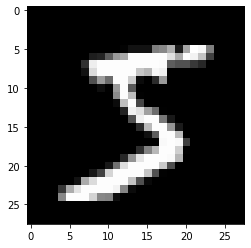

In [163]:
plt.imshow(img.view((28,28)));

In [164]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [165]:
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

In [166]:
m1 = x_test[:5]
m2 = weights
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [167]:
%time t1=matmul(m1, m2)

CPU times: user 886 ms, sys: 1.17 ms, total: 887 ms
Wall time: 891 ms


In [168]:
t1.shape

torch.Size([5, 10])

In [169]:
len(x_train)

60000

In [170]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [171]:
%timeit -n 10 _=matmul(m1, m2)

10 loops, best of 3: 1.16 ms per loop


Fully connected

In [172]:
def normalize(x, m, s): return (x-m)/s

In [173]:
train_mean,train_std = x_train.float().mean(),x_train.float().std()
train_mean,train_std

(tensor(33.3184), tensor(78.5675))

In [174]:
x_train = normalize(x_train, train_mean, train_std)
x_test = normalize(x_test, train_mean, train_std)

In [175]:
train_mean,train_std = x_train.mean(),x_train.std()
train_mean,train_std

(tensor(1.8892e-08), tensor(1.))

In [176]:
n,m = x_train.shape
c = y_train.max()+1
n,m,c

(60000, 784, tensor(10, dtype=torch.uint8))

In [177]:
# num hidden
nh = 50

In [178]:
# standard xavier init
w1 = torch.randn(m,nh)/math.sqrt(m)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)/math.sqrt(nh)
b2 = torch.zeros(1)

In [179]:
def test_near_zero(a,tol=1e-3): assert a.abs()<tol, f"Near zero: {a}"

In [180]:
test_near_zero(w1.mean())
test_near_zero(w1.std()-1/math.sqrt(m))

In [181]:
x_test.mean(),x_test.std()

(tensor(0.0060), tensor(1.0077))

In [182]:
def lin(x, w, b): return x@w + b

In [183]:
t = lin(x_test, w1, b1)

In [184]:
t.mean(),t.std()

(tensor(0.0299), tensor(0.9907))

In [185]:
def relu(x): return x.clamp_min(0.)

In [186]:
t = relu(lin(x_test, w1, b1))

In [187]:
t.mean(),t.std()

(tensor(0.4064), tensor(0.5901))

In [188]:
w1 = torch.randn(m,nh)*math.sqrt(2/m)

In [189]:
w1.mean(),w1.std()

(tensor(0.0001), tensor(0.0506))

In [190]:
t = relu(lin(x_test, w1, b1))
t.mean(),t.std()

(tensor(0.6659), tensor(0.8637))

In [191]:
from torch.nn import *

In [192]:
w1 = torch.zeros(m,nh)
init.kaiming_normal_(w1, mode='fan_out')
t = relu(lin(x_test, w1, b1))

In [193]:
init.kaiming_normal_ # He initialization ??

<function torch.nn.init.kaiming_normal_>

In [194]:
w1.mean(),w1.std()

(tensor(3.0734e-05), tensor(0.0502))

In [195]:
t.mean(),t.std()

(tensor(0.5756), tensor(0.8598))

In [196]:
torch.nn.Linear(m,nh).weight.shape

torch.Size([50, 784])

In [197]:
torch.nn.Linear.forward

<function torch.nn.modules.linear.Linear.forward>

In [198]:
torch.nn.functional.linear

<function torch.nn.functional.linear>

In [199]:
torch.nn.Conv2d

torch.nn.modules.conv.Conv2d

In [200]:
torch.nn.modules.conv._ConvNd.reset_parameters

<function torch.nn.modules.conv._ConvNd.reset_parameters>

In [201]:
def model(xb):
    l1 = lin(xb, w1, b1)
    l2 = relu(l1)
    l3 = lin(l2, w2, b2)
    return l3

In [202]:
%timeit -n 10 _=model(x_test)

10 loops, best of 3: 15.2 ms per loop


In [203]:
assert model(x_test).shape==torch.Size([x_test.shape[0],1])

In [204]:
model(x_test).shape

torch.Size([10000, 1])

In [205]:
def mse(output, targ):
  return (output.squeeze(-1) - targ).pow(2).mean()

In [206]:
y_train,y_test = y_train.float(),y_test.float()

In [207]:
preds = model(x_train)

In [208]:
preds.shape

torch.Size([60000, 1])

In [209]:
mse(preds, y_train)

tensor(33.6389)

In [210]:
def mse_grad(inp, targ): 
  # grad of loss with respect to output of previous layer
  inp.g = 2. * (inp.squeeze() - targ).unsqueeze(-1) / inp.shape[0]

In [211]:
def relu_grad(inp, out):
  # grad of relu with respect to input activations
  inp.g = (inp>0).float() * out.g

In [212]:
def lin_grad(inp, out, w, b):
  # grad of matmul with respect to input
  inp.g = out.g @ w.t()
  w.g = (inp.unsqueeze(-1) * out.g.unsqueeze(1)).sum(0)
  b.g = out.g.sum(0)

In [213]:
def forward_and_backward(inp, targ):
  # forward pass:
  l1 = inp @ w1 + b1
  l2 = relu(l1)
  out = l2 @ w2 + b2
  # we don't actually need the loss in backward!
  loss = mse(out, targ)
    
  # backward pass:
  mse_grad(out, targ)
  lin_grad(l2, out, w2, b2)
  relu_grad(l1, l2)
  lin_grad(inp, l1, w1, b1)

In [214]:
forward_and_backward(x_train, y_train)

In [215]:
# Save for testing against later
w1g = w1.g.clone()
w2g = w2.g.clone()
b1g = b1.g.clone()
b2g = b2.g.clone()
ig  = x_train.g.clone()

In [216]:
xt2 = x_train.clone().requires_grad_(True)
w12 = w1.clone().requires_grad_(True)
w22 = w2.clone().requires_grad_(True)
b12 = b1.clone().requires_grad_(True)
b22 = b2.clone().requires_grad_(True)

In [217]:
def forward(inp, targ):
    # forward pass:
    l1 = inp @ w12 + b12
    l2 = relu(l1)
    out = l2 @ w22 + b22
    # we don't actually need the loss in backward!
    return mse(out, targ)

In [218]:
loss = forward(xt2, y_train)
loss.backward()

In [219]:
print(w22.grad, w2g)
print(b22.grad, b2g)
print(w12.grad, w1g)
print(b12.grad, b1g)
print(xt2.grad, ig )

tensor([[ -1.8823],
        [ -5.6293],
        [ -2.3935],
        [ -0.3677],
        [-13.0085],
        [ -4.6367],
        [-15.9594],
        [ -3.3735],
        [ -5.8322],
        [ -5.4624],
        [ -7.0381],
        [ -4.1382],
        [ -1.0075],
        [-10.5820],
        [ -6.8411],
        [ -8.1842],
        [ -1.3238],
        [-10.5828],
        [ -5.7098],
        [-10.5315],
        [ -9.5829],
        [ -2.3183],
        [-22.4376],
        [ -3.6281],
        [ -2.9852],
        [ -1.4885],
        [ -2.5195],
        [-18.3640],
        [ -3.2372],
        [ -8.1833],
        [ -5.8164],
        [ -0.8848],
        [ -1.6302],
        [ -2.5014],
        [ -3.1072],
        [ -2.0093],
        [ -1.2332],
        [-13.8961],
        [ -4.6922],
        [ -7.9555],
        [ -4.7114],
        [ -1.0696],
        [ -4.3091],
        [ -3.9524],
        [-15.4197],
        [ -1.4192],
        [ -0.4760],
        [ -2.8275],
        [ -9.8383],
        [ -0.7783]])

Layer as class

In [220]:
class Relu():
    def __call__(self, inp):
        self.inp = inp
        self.out = inp.clamp_min(0.)-0.5
        return self.out
    
    def backward(self):
        self.inp.g = (self.inp>0).float() * self.out.g

In [221]:
class Lin():
    def __init__(self, w, b):
        self.w,self.b = w,b
        
    def __call__(self, inp):
        self.inp = inp
        self.out = inp@self.w + self.b
        return self.out
    
    def backward(self):
        self.inp.g = self.out.g @ self.w.t()
        # Creating a giant outer product, just to sum it, is inefficient!
        self.w.g = (self.inp.unsqueeze(-1) * self.out.g.unsqueeze(1)).sum(0)
        self.b.g = self.out.g.sum(0)

In [222]:
class Mse():
    def __call__(self, inp, targ):
        self.inp = inp
        self.targ = targ
        self.out = (inp.squeeze() - targ).pow(2).mean()
        return self.out
    
    def backward(self):
        self.inp.g = 2. * (self.inp.squeeze() - self.targ).unsqueeze(-1) / self.targ.shape[0]

In [223]:
class Model():
    def __init__(self, w1, b1, w2, b2):
        self.layers = [Lin(w1,b1), Relu(), Lin(w2,b2)]
        self.loss = Mse()
        
    def __call__(self, x, targ):
        for l in self.layers: x = l(x)
        return self.loss(x, targ)
    
    def backward(self):
        self.loss.backward()
        for l in reversed(self.layers):
            l.backward()

In [224]:
w1.g,b1.g,w2.g,b2.g = [None]*4
model = Model(w1, b1, w2, b2)

In [225]:
%time loss = model(x_train, y_train)

CPU times: user 107 ms, sys: 480 µs, total: 107 ms
Wall time: 111 ms


In [226]:
%time model.backward()

CPU times: user 3.72 s, sys: 48.6 ms, total: 3.77 s
Wall time: 3.77 s


In [227]:
class Module():
    def __call__(self, *args):
        self.args = args
        self.out = self.forward(*args)
        return self.out
    
    def forward(self): raise Exception('not implemented')
    def backward(self): self.bwd(self.out, *self.args)

In [228]:
class Relu(Module):
    def forward(self, inp): return inp.clamp_min(0.)-0.5
    def bwd(self, out, inp): inp.g = (inp>0).float() * out.g

In [229]:
class Lin(Module):
    def __init__(self, w, b): self.w,self.b = w,b
        
    def forward(self, inp): return inp@self.w + self.b
    
    def bwd(self, out, inp):
        inp.g = out.g @ self.w.t()
        self.w.g = inp.t() @ out.g
        self.b.g = out.g.sum(0)

In [230]:
class Mse(Module):
    def forward (self, inp, targ): return (inp.squeeze() - targ).pow(2).mean()
    def bwd(self, out, inp, targ): inp.g = 2*(inp.squeeze()-targ).unsqueeze(-1) / targ.shape[0]

In [231]:
from torch import nn

class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.layers = [nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out)]
        self.loss = mse
        
    def __call__(self, x, targ):
        for l in self.layers: x = l(x)
        return self.loss(x.squeeze(), targ)

In [232]:
model = Model(m, nh, 1)

In [233]:
%time loss = model(x_train, y_train)

CPU times: user 90.4 ms, sys: 86 µs, total: 90.5 ms
Wall time: 93 ms


In [234]:
%time loss.backward()

CPU times: user 67.7 ms, sys: 0 ns, total: 67.7 ms
Wall time: 68.4 ms


Mini batch training

In [235]:
import torch.nn.functional as F

In [236]:
mpl.rcParams['image.cmap'] = 'gray'

In [237]:
n,m = x_train.shape
c = y_train.max()+1
nh = 50

In [238]:
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.layers = [nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out)]
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [239]:
model = Model(m, nh, 10)
pred = model(x_train)

In [240]:
def log_softmax(x):
  return (x.exp()/(x.exp().sum(-1,keepdim=True))).log()

In [241]:
sm_pred = log_softmax(pred)

In [242]:
y_train[:3]

tensor([5., 0., 4.])

In [243]:
sm_pred[[0,1,2], [5,0,4]]
#sm_pred[[0,1,2]]

tensor([-2.5176, -2.2627, -2.3583], grad_fn=<IndexBackward>)

In [244]:
y_train.shape[0]

60000

In [245]:
loss_func = F.cross_entropy

In [246]:
def accuracy(out, yb):
  return (torch.argmax(out, dim=1)==yb).float().mean()

In [247]:
bs=64                  # batch size
xb = x_train[0:bs]     # a mini-batch from x
preds = model(xb)      # predictions
preds[0], preds.shape

(tensor([-0.2840,  0.2108, -0.2606,  0.2574, -0.0494, -0.2671,  0.0783, -0.1005,
         -0.1084, -0.1741], grad_fn=<SelectBackward>), torch.Size([64, 10]))

In [248]:
yb = y_train[0:bs]
loss_func(preds, yb.long())

tensor(2.3143, grad_fn=<NllLossBackward>)

In [249]:
accuracy(preds, yb)

tensor(0.0625)

In [250]:
lr = 0.5   # learning rate
epochs = 1 # how many epochs to train for

In [251]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
#         set_trace()
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        loss = loss_func(model(xb), yb.long())

        loss.backward()
        with torch.no_grad():
            for l in model.layers:
                if hasattr(l, 'weight'):
                    l.weight -= l.weight.grad * lr
                    l.bias   -= l.bias.grad   * lr
                    l.weight.grad.zero_()
                    l.bias  .grad.zero_()

In [252]:
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0069, grad_fn=<NllLossBackward>), tensor(1.))

In [253]:
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.l1 = nn.Linear(n_in,nh)
        self.l2 = nn.Linear(nh,n_out)
        
    def __call__(self, x):
      return self.l2(F.relu(self.l1(x)))

In [254]:
model = Model(m, nh, 10)

In [255]:
for name,l in model.named_children():
  print(f"{name}: {l}")

l1: Linear(in_features=784, out_features=50, bias=True)
l2: Linear(in_features=50, out_features=10, bias=True)


In [256]:
model

Model(
  (l1): Linear(in_features=784, out_features=50, bias=True)
  (l2): Linear(in_features=50, out_features=10, bias=True)
)

In [257]:
model.l1

Linear(in_features=784, out_features=50, bias=True)

In [258]:
def fit():
    for epoch in range(epochs):
        for i in range((n-1)//bs + 1):
            start_i = i*bs
            end_i = start_i+bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            loss = loss_func(model(xb), yb.long())

            loss.backward()
            with torch.no_grad():
                for p in model.parameters(): p -= p.grad * lr
                model.zero_grad()

In [259]:
fit()
loss_func(model(xb), yb.long()), accuracy(model(xb), yb.long())

(tensor(0.0073, grad_fn=<NllLossBackward>), tensor(1.))

In [260]:
layers = [nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10)]

In [261]:
class Model(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = layers
        for i,l in enumerate(self.layers): self.add_module(f'layer_{i}', l)
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [262]:
model = Model(layers)

In [263]:
model

Model(
  (layer_0): Linear(in_features=784, out_features=50, bias=True)
  (layer_1): ReLU()
  (layer_2): Linear(in_features=50, out_features=10, bias=True)
)

In [264]:
class SequentialModel(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList(layers)
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [265]:
model = SequentialModel(layers)

In [266]:
model

SequentialModel(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [267]:
fit()

In [268]:
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0127, grad_fn=<NllLossBackward>), tensor(1.))

In [269]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [270]:
fit()
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0061, grad_fn=<NllLossBackward>), tensor(1.))

In [271]:
nn.Sequential

torch.nn.modules.container.Sequential

In [272]:
model

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=10, bias=True)
)

In [273]:
class Optimizer():
    def __init__(self, params, lr=0.5):
        self.params,self.lr=list(params),lr
        
    def step(self):
        with torch.no_grad():
            for p in self.params: p -= p.grad * self.lr

    def zero_grad(self):
        for p in self.params: p.grad.data.zero_()

In [274]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [275]:
opt = Optimizer(model.parameters())

In [276]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [277]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
loss,acc

(tensor(0.0422, grad_fn=<NllLossBackward>), tensor(1.))

In [278]:
from torch import optim

In [279]:
optim.SGD.step

<function torch.optim.sgd.SGD.step>

In [280]:
def get_model():
    model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))
    return model, optim.SGD(model.parameters(), lr=lr)

In [281]:
model,opt = get_model()
loss_func(model(xb), yb.long())

tensor(2.3517, grad_fn=<NllLossBackward>)

In [282]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [283]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
loss,acc

(tensor(0.0103, grad_fn=<NllLossBackward>), tensor(1.))

In [284]:
class Dataset():
    def __init__(self, x, y): self.x,self.y = x,y
    def __len__(self): return len(self.x)
    def __getitem__(self, i): return self.x[i],self.y[i]

In [285]:
train_ds,test_ds = Dataset(x_train, y_train),Dataset(x_test, y_test)

In [286]:
xb,yb = train_ds[0:5]
xb,yb

(tensor([[-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241]]),
 tensor([5., 0., 4., 1., 9.]))

In [287]:
model,opt = get_model()

In [288]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        xb,yb = train_ds[i*bs : i*bs+bs]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [289]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
loss,acc

(tensor(0.0192, grad_fn=<NllLossBackward>), tensor(1.))

In [290]:
class Sampler():
    def __init__(self, ds, bs, shuffle=False):
        self.n,self.bs,self.shuffle = len(ds),bs,shuffle
        
    def __iter__(self):
        self.idxs = torch.randperm(self.n) if self.shuffle else torch.arange(self.n)
        for i in range(0, self.n, self.bs): yield self.idxs[i:i+self.bs]

In [291]:
small_ds = Dataset(*train_ds[:10])

In [292]:
s = Sampler(small_ds,3,False)
[o for o in s]

[tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([9])]

In [293]:
s = Sampler(small_ds,3,True)
[o for o in s]

[tensor([7, 6, 5]), tensor([4, 0, 1]), tensor([8, 2, 3]), tensor([9])]

In [294]:
def collate(b):
    xs,ys = zip(*b)
    return torch.stack(xs),torch.stack(ys)

In [295]:
class DataLoader():
    def __init__(self, ds, sampler, collate_fn=collate):
        self.ds,self.sampler,self.collate_fn = ds,sampler,collate_fn
        
    def __iter__(self):
        for s in self.sampler: yield self.collate_fn([self.ds[i] for i in s])

In [296]:
train_samp = Sampler(train_ds, bs, shuffle=True)
test_samp = Sampler(test_ds, bs, shuffle=False)

In [297]:
train_dl = DataLoader(train_ds, sampler=train_samp, collate_fn=collate)
test_dl = DataLoader(test_ds, sampler=test_samp, collate_fn=collate)

tensor(7.)

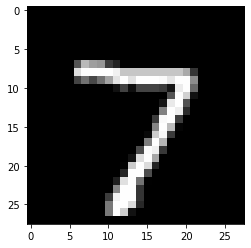

In [298]:
xb,yb = next(iter(test_dl))
plt.imshow(xb[0].view(28,28))
yb[0]

tensor(6.)

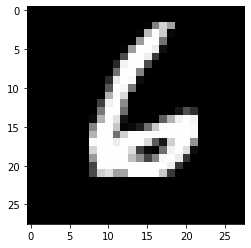

In [299]:
xb,yb = next(iter(train_dl))
plt.imshow(xb[0].view(28,28))
yb[0]

In [300]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
#         print(model.training)
        for xb,yb in train_dl:
            loss = loss_func(model(xb), yb.long())
            loss.backward()
            opt.step()
            opt.zero_grad()

        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in valid_dl:
                pred = model(xb)
                tot_loss += loss_func(pred, yb.long())
                tot_acc  += accuracy (pred,yb)
        nv = len(valid_dl)
        print(epoch, tot_loss/nv, tot_acc/nv)
    return tot_loss/nv, tot_acc/nv

In [301]:
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, **kwargs))

In [302]:
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler

In [303]:
train_dl,test_dl = get_dls(train_ds, test_ds, bs)
model,opt = get_model()
loss,acc = fit(5, model, loss_func, opt, train_dl, test_dl)

0 tensor(0.3061) tensor(0.9027)
1 tensor(0.2903) tensor(0.9161)
2 tensor(0.2633) tensor(0.9343)
3 tensor(0.1858) tensor(0.9482)
4 tensor(0.1853) tensor(0.9482)


Callbacks

In [304]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train = torch.reshape(x_train, shape=[x_train.shape[0],x_train.shape[1]*x_train.shape[2]])
x_valid = torch.reshape(x_valid, shape=[x_valid.shape[0],x_valid.shape[1]*x_valid.shape[2]])
train_ds,valid_ds = Dataset(x_train, y_train),Dataset(x_valid, y_valid)

In [305]:
nh,bs = 50,64
c = y_train.max().item()+1
loss_func = F.cross_entropy

In [306]:
class DataBunch():
    def __init__(self, train_dl, valid_dl, c=None):
        self.train_dl,self.valid_dl,self.c = train_dl,valid_dl,c
        
    @property
    def train_ds(self): return self.train_dl.dataset
        
    @property
    def valid_ds(self): return self.valid_dl.dataset

In [307]:
#data = DataBunch(*get_dls(train_ds, valid_ds, bs), c)

In [308]:
'''
def get_model(data, lr=0.5, nh=50):
    m = data.train_ds.x.shape[1]
    model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,data.c))
    return model, optim.SGD(model.parameters(), lr=lr)

class Learner():
    def __init__(self, model, opt, loss_func, data):
        self.model,self.opt,self.loss_func,self.data = model,opt,loss_func,data
'''

'\ndef get_model(data, lr=0.5, nh=50):\n    m = data.train_ds.x.shape[1]\n    model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,data.c))\n    return model, optim.SGD(model.parameters(), lr=lr)\n\nclass Learner():\n    def __init__(self, model, opt, loss_func, data):\n        self.model,self.opt,self.loss_func,self.data = model,opt,loss_func,data\n'

In [309]:
#learn = Learner(*get_model(data), loss_func, data)

In [310]:
'''
def fit(epochs, learn):
    for epoch in range(epochs):
        learn.model.train()
        for xb,yb in learn.data.train_dl:
            loss = learn.loss_func(learn.model(xb), yb)
            loss.backward()
            learn.opt.step()
            learn.opt.zero_grad()

        learn.model.eval()
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in learn.data.valid_dl:
                pred = learn.model(xb)
                tot_loss += learn.loss_func(pred, yb)
                tot_acc  += accuracy (pred,yb)
        nv = len(learn.data.valid_dl)
        print(epoch, tot_loss/nv, tot_acc/nv)
    return tot_loss/nv, tot_acc/nv
'''

'\ndef fit(epochs, learn):\n    for epoch in range(epochs):\n        learn.model.train()\n        for xb,yb in learn.data.train_dl:\n            loss = learn.loss_func(learn.model(xb), yb)\n            loss.backward()\n            learn.opt.step()\n            learn.opt.zero_grad()\n\n        learn.model.eval()\n        with torch.no_grad():\n            tot_loss,tot_acc = 0.,0.\n            for xb,yb in learn.data.valid_dl:\n                pred = learn.model(xb)\n                tot_loss += learn.loss_func(pred, yb)\n                tot_acc  += accuracy (pred,yb)\n        nv = len(learn.data.valid_dl)\n        print(epoch, tot_loss/nv, tot_acc/nv)\n    return tot_loss/nv, tot_acc/nv\n'

In [311]:
#loss,acc = fit(1, learn)